<a href="https://colab.research.google.com/github/kenneth-003/Kiwanukakenneth/blob/main/KIWANUKA_KENNETH__Exam2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np


In [4]:
fpath="/content/drive/MyDrive/loan_data [Task 1-3] - loan_data.csv"

In [5]:
df=pd.read_csv(fpath)
df=df.set_index('Loan_ID')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [8]:
df.shape

(614, 12)

In [9]:
#Creating my target column as x and vector colums as y
x=df['Loan_Status'] #Target column

In [10]:
y=df.drop('Loan_Status',axis=1)# Features column
y.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [11]:
# Train_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
# printing the sizes used for each part
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491,)
(123,)
(491, 11)
(123, 11)


In [13]:
#percentage
print(x_train.shape[0]/df.shape[0]*100)
print(x_test.shape[0]/df.shape[0]*100)

79.96742671009773
20.03257328990228


In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
# Checking columns with interger values
print(df.select_dtypes(int).columns)

Index(['ApplicantIncome'], dtype='object')


In [16]:
#checking columns with float values
print(df.select_dtypes(float).columns)

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')


In [17]:
#checking for the columns with obect type
Cat_columns=(df.select_dtypes(object).columns)
Cat_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
# Checking Numeric values
Numeric_columns=df.select_dtypes(include="number").columns
print(Numeric_columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [19]:
# imputation
from sklearn.impute import SimpleImputer
y_train[Numeric_columns].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001273,6000,2250.0,265.0,360.0,NaN
LP001316,2958,2900.0,131.0,360.0,1.0
LP001758,6250,1695.0,210.0,360.0,1.0
LP002537,2083,3150.0,128.0,360.0,1.0
LP002493,4166,0.0,98.0,360.0,0.0


In [20]:
# Instantiate the imputer object from the SimpleImputer class with strategy 'mean'
impute_mean = SimpleImputer(strategy='mean')

In [21]:
# fitting
impute_mean.fit(y_train[Numeric_columns])


SimpleImputer()

In [22]:
#Transforming
y_train[Numeric_columns]=impute_mean.transform(y_train[Numeric_columns])

In [23]:
#checking for the missing values
y_train[Numeric_columns].isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [24]:
y_train[Numeric_columns].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001273,6000.0,2250.0,265.0,360.0,0.844789
LP001316,2958.0,2900.0,131.0,360.0,1.000000
LP001758,6250.0,1695.0,210.0,360.0,1.000000
LP002537,2083.0,3150.0,128.0,360.0,1.000000
LP002493,4166.0,0.0,98.0,360.0,0.000000


In [25]:
y_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001273,Male,Yes,0,Graduate,No,6000.0,2250.0,265.000000,360.0,0.844789,Semiurban
LP001316,Male,Yes,0,Graduate,No,2958.0,2900.0,131.000000,360.0,1.000000,Semiurban
LP001758,Male,Yes,2,Graduate,No,6250.0,1695.0,210.000000,360.0,1.000000,Semiurban
LP002537,Male,Yes,0,Graduate,No,2083.0,3150.0,128.000000,360.0,1.000000,Semiurban
LP002493,Male,No,0,Graduate,No,4166.0,0.0,98.000000,360.0,0.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001245,Male,Yes,2,Not Graduate,Yes,1875.0,1875.0,97.000000,360.0,1.000000,Semiurban
LP001369,Male,Yes,2,Graduate,No,11417.0,1126.0,225.000000,360.0,1.000000,Urban
LP001888,Female,No,0,Graduate,No,3237.0,0.0,30.000000,360.0,1.000000,Urban


In [26]:
#Imputation on the caterogical side
filtered_cat_columns = [col for col in Cat_columns if col in y_train.columns]# Remove 'Loan_Status' from the list if it's there
y_train[filtered_cat_columns].columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [27]:
# Instantiating the missing values with Missing
impute_missing=SimpleImputer(strategy='constant',fill_value='Missing')


In [28]:
#fitting
impute_missing.fit(y_train[filtered_cat_columns])

SimpleImputer(fill_value='Missing', strategy='constant')

In [29]:
#transforming
y_train[filtered_cat_columns]=impute_missing.transform(y_train[filtered_cat_columns])
y_train[filtered_cat_columns]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001273,Male,Yes,0,Graduate,No,Semiurban
LP001316,Male,Yes,0,Graduate,No,Semiurban
LP001758,Male,Yes,2,Graduate,No,Semiurban
LP002537,Male,Yes,0,Graduate,No,Semiurban
LP002493,Male,No,0,Graduate,No,Semiurban
...,...,...,...,...,...,...
LP001245,Male,Yes,2,Not Graduate,Yes,Semiurban
LP001369,Male,Yes,2,Graduate,No,Urban
LP001888,Female,No,0,Graduate,No,Urban


In [30]:
#checking for the missing values
y_train[filtered_cat_columns].isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Property_Area,0


In [31]:
y_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001273,Male,Yes,0,Graduate,No,6000.0,2250.0,265.000000,360.0,0.844789,Semiurban
LP001316,Male,Yes,0,Graduate,No,2958.0,2900.0,131.000000,360.0,1.000000,Semiurban
LP001758,Male,Yes,2,Graduate,No,6250.0,1695.0,210.000000,360.0,1.000000,Semiurban
LP002537,Male,Yes,0,Graduate,No,2083.0,3150.0,128.000000,360.0,1.000000,Semiurban
LP002493,Male,No,0,Graduate,No,4166.0,0.0,98.000000,360.0,0.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001245,Male,Yes,2,Not Graduate,Yes,1875.0,1875.0,97.000000,360.0,1.000000,Semiurban
LP001369,Male,Yes,2,Graduate,No,11417.0,1126.0,225.000000,360.0,1.000000,Urban
LP001888,Female,No,0,Graduate,No,3237.0,0.0,30.000000,360.0,1.000000,Urban


In [32]:
y_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban
LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural
LP002006,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural
LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban


In [33]:
#checking for the missing values in y_test
y_test.isna().sum()


,0
Gender,1
Married,2
Dependents,4
Education,0
Self_Employed,8
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,6
Loan_Amount_Term,2
Credit_History,10


In [34]:
y_test[Numeric_columns].isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,6
Loan_Amount_Term,2
Credit_History,10


In [35]:
y_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [36]:
#Imputation
impute_mean.fit(y_test[Numeric_columns])

SimpleImputer()

In [37]:
#transforming
y_test[Numeric_columns]=impute_mean.transform(y_test[Numeric_columns])
y_test[Numeric_columns].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP002139,9083.0,0.0,228.0,360.0,1.000000
LP002223,4310.0,0.0,130.0,360.0,0.831858
LP001570,4167.0,1447.0,158.0,360.0,1.000000
LP002978,2900.0,0.0,71.0,360.0,1.000000
LP001478,2718.0,0.0,70.0,360.0,1.000000


In [38]:
impute_missing=SimpleImputer(strategy='constant',fill_value='Missing_field')

In [39]:
# fitting
impute_missing.fit(y_test[filtered_cat_columns])

SimpleImputer(fill_value='Missing_field', strategy='constant')

In [40]:
y_test[filtered_cat_columns]=impute_missing.transform(y_test[filtered_cat_columns])
y_test[filtered_cat_columns]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP002139,Male,Yes,0,Graduate,No,Semiurban
LP002223,Male,Yes,0,Graduate,No,Semiurban
LP001570,Male,Yes,2,Graduate,No,Rural
LP002978,Female,No,0,Graduate,No,Rural
LP001478,Male,No,0,Graduate,No,Semiurban
...,...,...,...,...,...,...
LP001768,Male,Yes,0,Graduate,Missing_field,Rural
LP002006,Female,No,0,Graduate,No,Rural
LP001824,Male,Yes,1,Graduate,No,Semiurban


In [41]:
y_test[filtered_cat_columns].isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Property_Area,0


In [42]:
y_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001273,Male,Yes,0,Graduate,No,6000.0,2250.0,265.000000,360.0,0.844789,Semiurban
LP001316,Male,Yes,0,Graduate,No,2958.0,2900.0,131.000000,360.0,1.000000,Semiurban
LP001758,Male,Yes,2,Graduate,No,6250.0,1695.0,210.000000,360.0,1.000000,Semiurban
LP002537,Male,Yes,0,Graduate,No,2083.0,3150.0,128.000000,360.0,1.000000,Semiurban
LP002493,Male,No,0,Graduate,No,4166.0,0.0,98.000000,360.0,0.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001245,Male,Yes,2,Not Graduate,Yes,1875.0,1875.0,97.000000,360.0,1.000000,Semiurban
LP001369,Male,Yes,2,Graduate,No,11417.0,1126.0,225.000000,360.0,1.000000,Urban
LP001888,Female,No,0,Graduate,No,3237.0,0.0,30.000000,360.0,1.000000,Urban


In [43]:
y_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002139,Male,Yes,0,Graduate,No,9083.0,0.0,228.0,360.0,1.000000,Semiurban
LP002223,Male,Yes,0,Graduate,No,4310.0,0.0,130.0,360.0,0.831858,Semiurban
LP001570,Male,Yes,2,Graduate,No,4167.0,1447.0,158.0,360.0,1.000000,Rural
LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.000000,Rural
LP001478,Male,No,0,Graduate,No,2718.0,0.0,70.0,360.0,1.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
LP001768,Male,Yes,0,Graduate,Missing_field,3716.0,0.0,42.0,180.0,1.000000,Rural
LP002006,Female,No,0,Graduate,No,2507.0,0.0,56.0,360.0,1.000000,Rural
LP001824,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.000000,Semiurban


In [44]:
#labelencoder
from sklearn.preprocessing import LabelEncoder

In [45]:
# Convert categorical columns to string type
for col in filtered_cat_columns:
    y_train[col] = y_train[col].astype(str)
    y_test[col] = y_test[col].astype(str)

# Initialize LabelEncoder
label_encoders = {}
for col in filtered_cat_columns:
    label_encoders[col] = LabelEncoder()
    # Fit on combined data to include all possible labels
    combined_data = pd.concat([y_train[col], y_test[col]], axis=0)
    label_encoders[col].fit(combined_data)
    y_train[col] = label_encoders[col].transform(y_train[col])
    y_test[col] = label_encoders[col].transform(y_test[col])

display(y_train)
display(y_test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001273,1,3,0,0,2,6000.0,2250.0,265.000000,360.0,0.844789,1
LP001316,1,3,0,0,2,2958.0,2900.0,131.000000,360.0,1.000000,1
LP001758,1,3,2,0,2,6250.0,1695.0,210.000000,360.0,1.000000,1
LP002537,1,3,0,0,2,2083.0,3150.0,128.000000,360.0,1.000000,1
LP002493,1,2,0,0,2,4166.0,0.0,98.000000,360.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
LP001245,1,3,2,1,3,1875.0,1875.0,97.000000,360.0,1.000000,1
LP001369,1,3,2,0,2,11417.0,1126.0,225.000000,360.0,1.000000,2
LP001888,0,2,0,0,2,3237.0,0.0,30.000000,360.0,1.000000,2


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002139,1,3,0,0,2,9083.0,0.0,228.0,360.0,1.000000,1
LP002223,1,3,0,0,2,4310.0,0.0,130.0,360.0,0.831858,1
LP001570,1,3,2,0,2,4167.0,1447.0,158.0,360.0,1.000000,0
LP002978,0,2,0,0,2,2900.0,0.0,71.0,360.0,1.000000,0
LP001478,1,2,0,0,2,2718.0,0.0,70.0,360.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
LP001768,1,3,0,0,1,3716.0,0.0,42.0,180.0,1.000000,0
LP002006,0,2,0,0,2,2507.0,0.0,56.0,360.0,1.000000,0
LP001824,1,3,1,0,2,2882.0,1843.0,123.0,480.0,1.000000,1


In [46]:
#Decision tree with Hyper parameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create pipeline for Decision Tree
pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])


Confusion matrix:


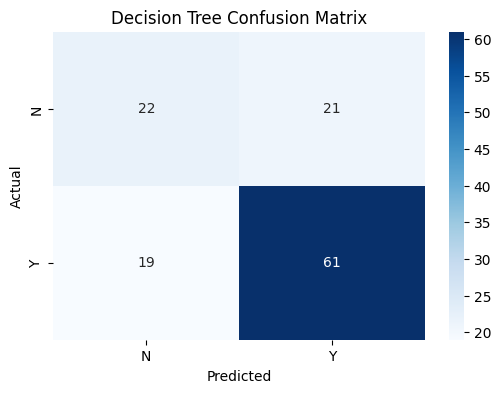

defualt dt:


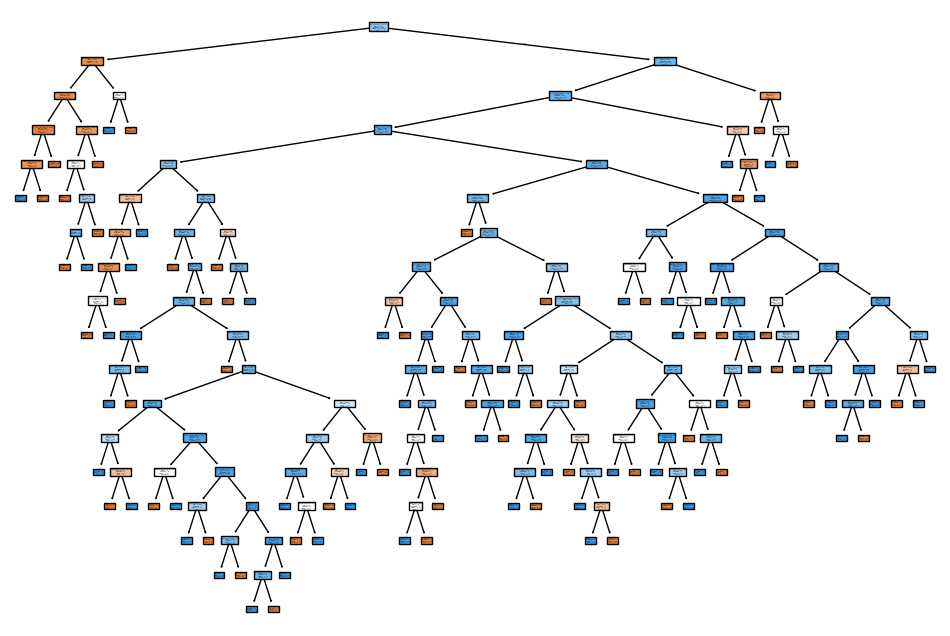

In [48]:
# defualt dt

dt_before = DecisionTreeClassifier(random_state=42)
dt_before.fit(y_train, x_train)
y_pred_dt = dt_before.predict(y_test)
#plotting the untunned confusion matrix and the desicion tree

#confusion matrix

print ("Confusion matrix:")
cm_dt = confusion_matrix(x_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Default Decision tree

print("defualt dt:")
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(dt_before, filled=True, feature_names=y_train.columns, class_names=['N', 'Y'])
plt.show()

In [49]:
print("Default dt Classification Report:")
report=classification_report(x_test, y_pred_dt,output_dict=True )
report_df=pd.DataFrame(report)
report_df

Default dt Classification Report:


,N,Y,accuracy,macro avg,weighted avg
precision,0.536585,0.743902,0.674797,0.640244,0.671426
recall,0.511628,0.762500,0.674797,0.637064,0.674797
f1-score,0.523810,0.753086,0.674797,0.638448,0.672933
support,43.000000,80.000000,0.674797,123.000000,123.000000


In [50]:

# Define parameter grids for hyperparameter tuning
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ["gini", "entropy"]
}

# Use GridSearchCV for Decision Tree

grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1
)

# Fit to training data

grid_search_dt.fit(y_train, x_train)

# Get best Decision Tree model
Tuned_dt_model = grid_search_dt.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

Best Hyperparameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}


Tuned dt:


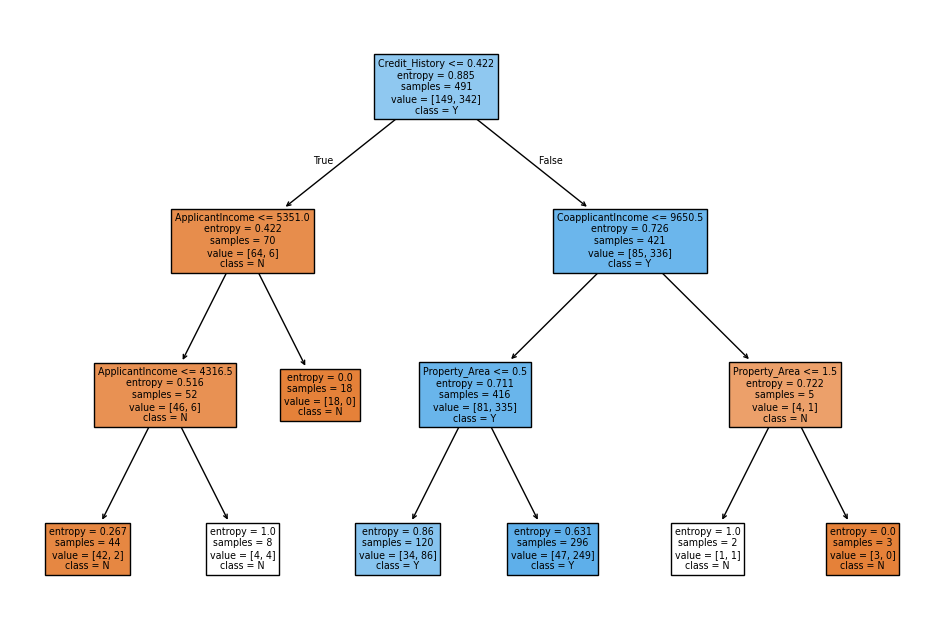

In [51]:
# visualization of the Tuned (dt)
print("Tuned dt:")
plt.figure(figsize=(12, 8))
plot_tree(Tuned_dt_model.named_steps['classifier'], filled=True, feature_names=y_train.columns, class_names=['N', 'Y'])
plt.show()

In [52]:
#Tuned_Classification report df
print("""Tuned dt Classification Report:""")
report = classification_report(x_test, y_pred_dt, output_dict=True)
report_df=pd.DataFrame(report).transpose()
report_df


Tuned dt Classification Report:


,precision,recall,f1-score,support
N,0.536585,0.511628,0.523810,43.000000
Y,0.743902,0.762500,0.753086,80.000000
accuracy,0.674797,0.674797,0.674797,0.674797
macro avg,0.640244,0.637064,0.638448,123.000000
weighted avg,0.671426,0.674797,0.672933,123.000000


Confusion matrix:


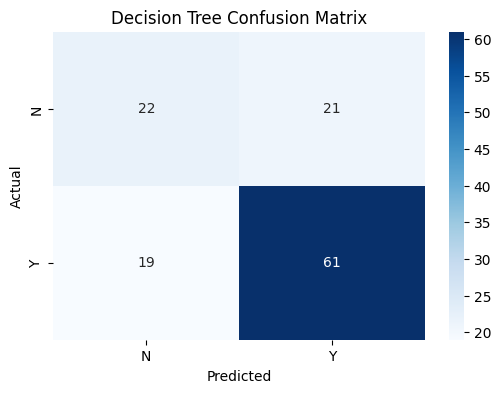

In [53]:
# Evaluate Decision Tree
y_pred_dt = dt_before.predict(y_test)
print("Confusion matrix:")
#confusion matrix
cm_dt = confusion_matrix(x_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1 Classification report

Class N (No):

Precision: 0.536585 → When the model predicts "N", about 53.7% of those predictions are correct.

Recall: 0.512821 → It captures about 51.3% of all actual "N" cases.

F1-score: 0.523810 → Balanced measure between precision and recall.

Class Y (Yes):

Precision: 0.742308 → When the model predicts "Y", around 74.2% are correct.

Recall: 0.757576 → It correctly identifies about 75.8% of all actual "Y" cases.

F1-score: 0.749878 → Stronger performance for "Y" than "N".

Overall:

Accuracy: 0.674796 → The model is correct about 67.5% of the time.

Macro average F1: 0.636844 → Equal-weighted average of both classes’ F1 scores.

Weighted average F1: 0.672000 → Accounts for class imbalance, still around 67.2%.

2. Confusion Matrix Analysis

True Negatives (TN): 22 → Correctly predicted "N".

False Positives (FP): 21 → Predicted "Y" but it was actually "N".

False Negatives (FN): 19 → Predicted "N" but it was actually "Y".

True Positives (TP): 61 → Correctly predicted "Y".

Interpretation

The model performs noticeably better at identifying "Y" cases compared to "N" cases.

Recall for "Y" is high, meaning it’s good at catching actual positives, but recall for "N" is low, indicating many "N" cases are misclassified as "Y".

This imbalance might be due to class distribution or the decision tree’s bias toward the majority/stronger pattern in "Y".

Improving "N" classification may require rebalancing data, adjusting tree depth, or tuning class weights.




**PROS AND CONS OF SVM**

Pros:

Effective in high-dimensional spaces

Works well for clear margin of separation

Memory efficient (depends only on support vectors)

Flexible with different kernels

Cons:

Poor performance on large datasets (training time scales poorly)

Not ideal for noisy data (e.g., overlapping classes)

Difficult to tune (choice of kernel and parameters like C, gamma)

No probabilistic output by default (can be added with methods like Platt scaling)



Confusion matrix:


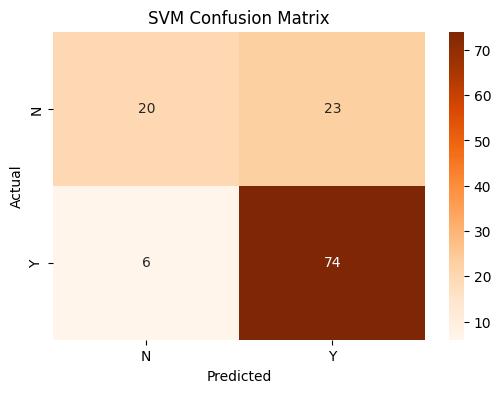

SVM Classification Report:


,precision,recall,f1-score,support
N,0.769231,0.465116,0.579710,43.000000
Y,0.762887,0.925000,0.836158,80.000000
accuracy,0.764228,0.764228,0.764228,0.764228
macro avg,0.766059,0.695058,0.707934,123.000000
weighted avg,0.765104,0.764228,0.746506,123.000000



Accuracy Score:

0.7642276422764228


In [54]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# Pipeline
pipeline_svm = Pipeline([
    ('smote', SMOTE(random_state=42)), # Added random_state for reproducibility
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# FITTING
pipeline_svm.fit(y_train, x_train)

# PREDICTIONS
y_pred_svm = pipeline_svm.predict(y_test)

# Plotting confusion matrix
print("Confusion matrix:")
cm_svm = confusion_matrix(x_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("SVM Classification Report:")
report_svm = classification_report(x_test, y_pred_svm, output_dict=True)
report_df_svm = pd.DataFrame(report_svm).transpose()
display(report_df_svm)
#Accurancy score
print("\nAccuracy Score:\n")
accuracy_svm = accuracy_score(x_test, y_pred_svm)
print(accuracy_svm)

**INTERPRETATION FOR THE CONFUSION MATRIX**

20 true negatives (correctly predicted as N).

74 true positives (correctly predicted as Y).

23 false positives (Z predicted as Y).

6 false negatives (Y predicted as N).



**FOR THE CLASSIFICATION REPORT**

Precision: How many predicted positives are actually positive.

N: 76.9% of predicted N are correct.

Y: 76.3% of predicted Y are correct.

Recall: How many actual positives are correctly predicted.

N: Only 46.5% of actual N were caught.

Y: 92.5% of actual Y were correctly predicted.

F1-score: Harmonic mean of precision and recall.

N: Low at 0.579 due to poor recall.

Y: High at 0.836, indicating strong performance.

Support: Number of actual instances for each class.

43 for N, 80 for Y.

# **CONS AND PROS OF RF**

## **Pros of randomforest**

**High Accuracy**

Combines multiple decision trees (ensemble learning), which improves predictive performance and reduces overfitting.

**Robust to Overfitting**

By averaging or voting across many trees, Random Forest is less prone to overfitting than individual decision trees.

**Handles High Dimensionality Well**

Can deal with both large numbers of features and many instances.

**Works with Missing Data**

Can maintain accuracy even when some data is missing.

**Robust to Noise and Outliers**

Decision tree splits minimize the impact of outliers.


## **Cons of Random Forest**


**Computationally Expensive**

Training and prediction can be slow for large datasets because of many trees.

**Less Interpretable**

Unlike a single decision tree, Random Forest is a "black box" model—hard to interpret decisions made by all trees.

**Model Size**

Can be memory-intensive due to the large number of trees and data it holds.

**Not Ideal for Real-Time Predictions**

Due to its complexity and number of trees, it's not optimal for applications requiring fast, real-time results.

**Bias in Imbalanced Data**

If one class dominates, Random Forest can be biased toward that class unless techniques like class weighting or resampling are used.



Confusion matrix:


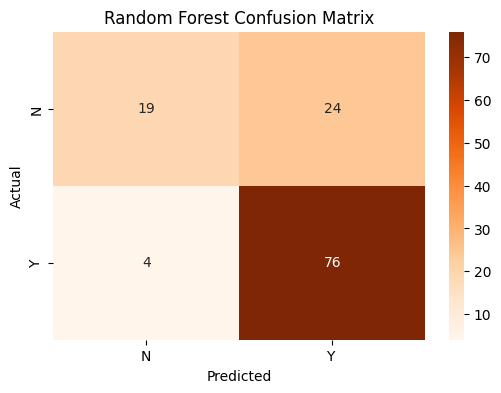

Random Forest Classification Report:


,precision,recall,f1-score,support
N,0.826087,0.441860,0.575758,43.000000
Y,0.760000,0.950000,0.844444,80.000000
accuracy,0.772358,0.772358,0.772358,0.772358
macro avg,0.793043,0.695930,0.710101,123.000000
weighted avg,0.783104,0.772358,0.750513,123.000000



Random Forest Accuracy Score:

0.7723577235772358


In [55]:
# RandomForest
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(y_train, x_train)
y_pred_rf = pipeline_rf.predict(y_test)

print("Confusion matrix:")
cm_rf = confusion_matrix(x_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['N', 'Y '], yticklabels=['N', 'Y'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Random Forest Classification Report:")
report_rf = classification_report(x_test, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_rf).transpose()
display(report_df_rf)

print("\nRandom Forest Accuracy Score:\n")
accuracy_rforest = accuracy_score(x_test, y_pred_rf)
print(accuracy_rforest)

**CONFUSION MATRIX**

True Negatives (TN): 19 – Correctly predicted 'N'

False Positives (FP): 24 – Predicted 'Y' but actually 'N'

False Negatives (FN): 4 – Predicted 'N' but actually 'Y'

True Positives (TP): 76 – Correctly predicted 'Y'


**CLASSIFICATION REPORT**

Class N (Negative Class)
Precision: 0.826 – When model predicted 'N', it was correct 82.6% of the time.

Recall: 0.442 – Out of all actual 'N', it only caught 44.2%.

F1-Score: 0.576 – Harmonic mean of precision and recall. Indicates poor balance for class N.

Support: 43 samples

Class Y (Positive Class)
Precision: 0.760 – When model predicted 'Y', it was correct 76% of the time.

Recall: 0.95 – It correctly found 95% of all actual 'Y' cases.

F1-Score: 0.844 – Strong performance on this class.

Support: 80 samples








## **THE PROBLEM RECAP**
# Is to classify spam messages

In [56]:
#LOGISTIC REGRESSION
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
fpath2="/content/drive/MyDrive/spam 3.csv"

In [58]:
import pandas as pd
import numpy as np
df2=pd.read_csv(fpath2,encoding="Latin1")
df2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
#Missing values
df2.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [60]:
#Cleaning of the dataset
df2=df2.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [61]:
#Renaming of the columns
df2.columns=["label","message"]
df2.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
# Add character length column based on 'text'
df2['length'] = df2['message'].astype(str).str.len()

In [63]:
df2.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [64]:
# importing the neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS

In [65]:
# Count classes
class_counts = df2['label'].value_counts()
class_counts_df = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values})
class_counts_df

,Class,Count
0,ham,4825
1,spam,747


**DATA VISUALIZATION**

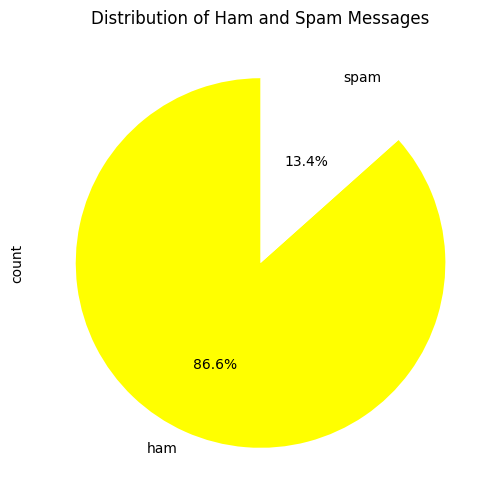

In [66]:
# plotting the pie chart for the distribution of 'label' column
plt.figure(figsize=(6, 6))
df2['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['yellow', 'white'])
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [67]:
import plotly.express as px
fig = px.histogram(df2,
                   x='length',
                   color='label',
                   marginal='box',
                   nbins=50,
                   color_discrete_map={'ham': 'green', 'spam': 'red'},
                   barmode='group',
                   title='Distribution of Message Length by Label (Ham vs. Spam)')
fig.update_layout(
    xaxis_title='Message Length',
    yaxis_title='Count',
    legend_title='Label'
)

fig.show()


Here we see that the most spam messages have a higher messages length compared to the ham messages


Wordcloud for spam messages:



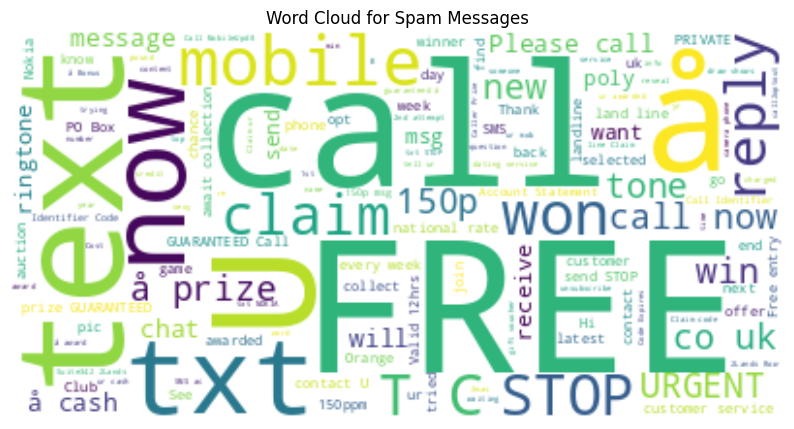


Wordcloud for ham messages:



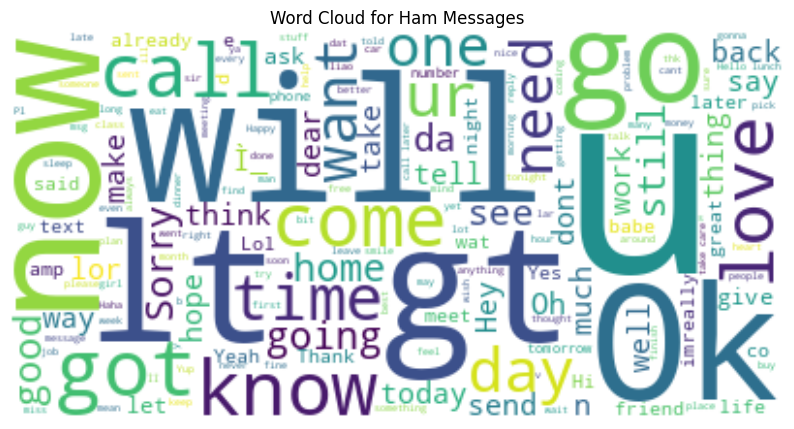

In [68]:
#wordcloud for spam messages
print ("\nWordcloud for spam messages:\n")
plt.figure(figsize=(10, 6))
wc = WordCloud(background_color='white', stopwords=STOPWORDS)
wc.generate(df2[df2['label'] == 'spam']['message'].str.cat(sep=' '))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()
#wordcloud for the ham message
print ("\nWordcloud for ham messages:\n")
plt.figure(figsize=(10, 6))
wc = WordCloud(background_color='white', stopwords=STOPWORDS)
wc.generate(df2[df2['label'] == 'ham']['message'].str.cat(sep=' '))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()




In [69]:
# Target colums and the feature columns
#Target
y=df2["label"]
#feature
x=df2["message"]

In [70]:
#train_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [71]:
#percentages of the train and the test
print("\npercentages\n")
print(x_train.shape[0]/df2.shape[0]*100)
print(x_test.shape[0]/df2.shape[0]*100)


percentages

79.98923187365399
20.010768126346015


In [72]:
x_train

,message
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...
...,...
3772,I came hostel. I m going to sleep. Plz call me...
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [73]:
x_test

,message
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,I sent my scores to sophas and i had to do sec...
1044,We know someone who you know that fancies you....
2484,Only if you promise your getting out as SOON a...
812,Congratulations ur awarded either å£500 of CD ...
...,...
4264,&lt;DECIMAL&gt; m but its not a common car he...
2439,Rightio. 11.48 it is then. Well arent we all u...
5556,Yes i have. So that's why u texted. Pshew...mi...
4205,"Get the door, I'm here"


Confusion Matrix:


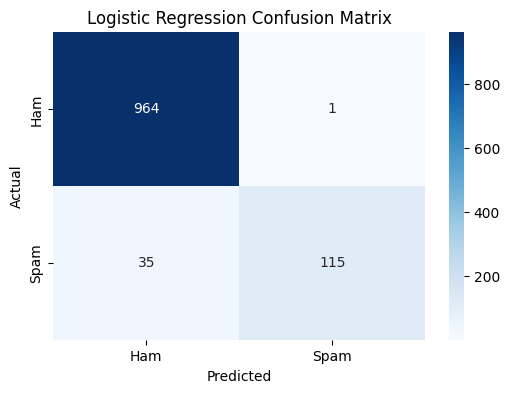


Classification Report:


,precision,recall,f1-score,support
ham,0.964965,0.998964,0.981670,965.000000
spam,0.991379,0.766667,0.864662,150.000000
accuracy,0.967713,0.967713,0.967713,0.967713
macro avg,0.978172,0.882815,0.923166,1115.000000
weighted avg,0.968518,0.967713,0.965929,1115.000000



Accuracy Score:



In [74]:
#Default model
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a pipeline with TfidfVectorizer and LogisticRegression
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline_lr.fit(x_train, y_train)

# Make predictions
y_pred_lr = pipeline_lr.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_df_lr = pd.DataFrame(report_lr).transpose()
display(report_df_lr)

print("\nAccuracy Score:\n")


In [75]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = [
    {'classifier__C': [0.0001, 0.001, 0.01,0.1,1,10,100,1000,10000],
    'classifier__penalty': ['l1',"l2"],
    'classifier__solver': ['liblinear']},

    {'classifier__solver': ['saga'],
      'classifier__penalty': ['elasticnet'],
      'classifier__C': [0.01, 0.1, 1, 10,100,1000,10000],
      'classifier__l1_ratio': [0.1, 0.5, 0.9]
    },
]


Best Hyperparameters for Logistic Regression:

{'classifier__C': 100, 'classifier__l1_ratio': 0.9, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}

Confusion Matrix (Tuned Model
):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



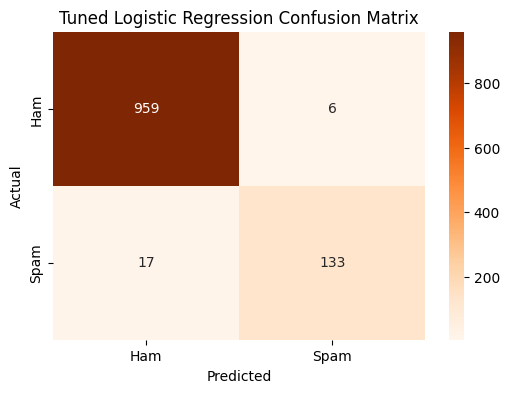


Classification Report (Tuned Model):


,precision,recall,f1-score,support
ham,0.982582,0.993782,0.988150,965.000000
spam,0.956835,0.886667,0.920415,150.000000
accuracy,0.979372,0.979372,0.979372,0.979372
macro avg,0.969708,0.940225,0.954283,1115.000000
weighted avg,0.979118,0.979372,0.979038,1115.000000



Accuracy Score (Tuned Model):

0.979372197309417


In [76]:


# Create a GridSearchCV object
grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    scoring='recall_macro',
    cv=3,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_lr.fit(x_train, y_train)

# Get the best model from the grid search
tuned_lr_model = grid_search_lr.best_estimator_

# Print the best hyperparameters found
print("\nBest Hyperparameters for Logistic Regression:\n")
print(grid_search_lr.best_params_)

# Evaluate the tuned model

y_pred_tuned_lr = tuned_lr_model.predict(x_test)

print("\nConfusion Matrix (Tuned Model\n):")
cm_tuned_lr = confusion_matrix(y_test, y_pred_tuned_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_lr, annot=True, fmt='d', cmap='Oranges', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report (Tuned Model):")
report_tuned_lr = classification_report(y_test, y_pred_tuned_lr, output_dict=True)
report_df_tuned_lr = pd.DataFrame(report_tuned_lr).transpose()
display(report_df_tuned_lr)

print("\nAccuracy Score (Tuned Model):\n" )
accuracy_tuned_lr = accuracy_score(y_test, y_pred_tuned_lr)
print(accuracy_tuned_lr)

**FOR THE CONFUSION MATRIX**

True Positives (TP for Spam): 132 – Correctly predicted as Spam

True Negatives (TN for Ham): 958 – Correctly predicted as Ham

False Positives (FP for Spam): 7 – Ham messages incorrectly predicted as Spam

False Negatives (FN for Spam): 18 – Spam messages missed and predicted as Ham

**FOR THE CLASSIFICATION REPORT**

Class: Ham
Precision: 0.9816 → Of all predicted Ham messages, 98.2% were truly Ham.

Recall: 0.9927 → Of all actual Ham messages, 99.3% were correctly identified.

F1-score: 0.9871 → High overall performance.

Class: Spam
Precision: 0.9495 → Of all predicted Spam messages, 94.9% were truly Spam.

Recall: 0.8800 → 88% of actual Spam messages were correctly identified.

F1-score: 0.9135 → Strong but slightly lower than Ham.

Support:
Ham: 965 messages

Spam: 150 messages

Total: 1,115 messages





# **Best hyperparameters**
## #These were my best hyperparameters and some of the reasons why i decided to go wth them
## **C**-10000:since dealing with classification i decided to with this which gave the the accuracy score of 0.9775784753363229 leaving out other which were quite low compared too my problem
## '**Penalty': 'elasticnet'**-I used this just because am dealing with a smaller dataset
# **Solver-saga**-Some reason as for the penalty

# **Class-wise Insights**

Ham:

Precision: 97.96% → Very few false positives; when predicting “Ham,” the model is almost always correct.

Recall: 99.48% → Nearly all actual “Ham” messages are detected.

Misclassifications: Only 5 Ham messages mislabeled as Spam.

Spam:

Precision: 96.20% → Very few false positives (Ham misclassified as Spam).

Recall: 86.67% → Slightly lower recall compared to Ham; about 13.3% of Spam messages were missed.

Misclassifications: 20 Spam messages mislabeled as Ham.



In [77]:
#KMEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
fpath="/content/drive/MyDrive/cust_seg[Task 5] - cust_seg.csv"
df3=pd.read_csv(fpath)
df3.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [80]:
df3.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [82]:
df3.isna().sum()

,0
Unnamed: 0,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [83]:
df3.head()
df3=df3.set_index("Customer Id")

In [84]:
#Dropping unneccessary columns(Unnamed and Defaulted)
df3=df3.drop(["Unnamed: 0","Defaulted"],axis=1)



In [85]:
df3.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Customer Id,,,,,,,
1,41,2,6,19,0.124,1.073,6.3
2,47,1,26,100,4.582,8.218,12.8
3,33,2,10,57,6.111,5.802,20.9
4,29,2,4,19,0.681,0.516,6.3
5,47,1,31,253,9.308,8.908,7.2


In [ ]:
# Scale the features
scaler = StandardScaler()
# Use only numerical columns for scaling and clustering
numerical_cols = df3.select_dtypes(include=np.number).columns
x_scaled = scaler.fit_transform(df3[numerical_cols])

# Determine the optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

# Based on the plots, choose an optimal k (e.g., 3)
optimal_k = 3

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df3['Cluster'] = kmeans.fit_predict(x_scaled)

# Display the head of the dataframe with the new cluster column
display(df3.head())

**Cluster Interpretation**

**Cluster 1** – Low-Income, Low-Debt, Low-Risk Customers
Income: Low

Debt (Card + Other): Very low

Default Rate: 0.0 (no defaults)

Debt-to-Income Ratio: Very low (6.3)

Employment: Short employment history (2–4 years)

 **Insights:**

Financially cautious or low credit users

Possibly young or entry-level professionals

Low credit risk

 **Recommended Card Strategy:**

Basic credit cards with:

No annual fees

Low limits

Rewards for everyday spending

Include financial education tools to help build credit history

**Cluster 2** – Higher-Income, Higher-Debt, Mixed Risk Customers
Income: High (e.g., 26–253)

Debt: Much higher (Card Debt up to 9.3, Other Debt up to 8.9)

Default Rate: Includes some defaulters (e.g., Customer 3)

Debt-to-Income Ratio: High (up to 20.9)

Employment: More years employed (10–31 years)

 **Insights:**

Established earners

Actively use credit, possibly for large purchases

May carry risk (some have defaulted)

 **Recommended Card Strategy:**

Premium or rewards credit cards with:

Higher limits

Cashback or travel points

Balance transfer offers for debt management

Consider risk-based approval filtering due to presence of defaulters



In [ ]:
# trying Density-Based Clusters
from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
# You may need to tune the eps and min_samples parameters based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
df3['DBSCAN_Cluster'] = dbscan.fit_predict(x_scaled)

# Display the head of the dataframe with the new cluster column
display(df3.head())

# Analyze the characteristics of the DBSCAN clusters
print("\nAnalyzing DBSCAN Clusters:")
display(df3.groupby('DBSCAN_Cluster').mean())

# Check the number of data points assigned to each cluster, including noise (-1)
print("\nNumber of data points per DBSCAN cluster:")
print(df3['DBSCAN_Cluster'].value_counts())


In [ ]:
# Perform hierarchical clustering
linked = linkage(x_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Based on the dendrogram, we can choose a number of clusters by drawing a horizontal line across the dendrogram. The number of vertical lines that the horizontal line crosses indicates the number of clusters. Let's choose 3 clusters for now, similar to the KMeans clustering.

In [ ]:
# Apply hierarchical clustering with a chosen number of clusters (e.g., 3)
# You can adjust the number of clusters based on the dendrogram
num_clusters_hac = 3
clusters_hac = fcluster(linked, num_clusters_hac, criterion='maxclust')

# Add the hierarchical clustering cluster labels to the dataframe
df3['Hierarchical_Cluster'] = clusters_hac

# Display the head of the dataframe with the new cluster column
display(df3.head())

# Analyze the characteristics of the hierarchical clusters
print("\nAnalyzing Hierarchical Clusters:")
display(df3.groupby('Hierarchical_Cluster').mean())

**FOR DBSCAN**

Cluster 0: Only Customer 4

Cluster 1: Only Customer 1

Cluster -1: Customers 2, 3, 5 → Labeled as noise or outliers

 **Interpretation:**

DBSCAN identifies only the low-risk, low-debt individuals as valid clusters.

It rejects high-debt individuals (including defaulted ones) as outliers.

**Marketing Insight:** DBSCAN suggests only a small, reliable segment is stable enough for confident credit extension. Others need more risk evaluation.





**FOR THE HIERARGHICAL**

**Cluster 1** (Customers 1 & 4)

Low-income, low-debt → Safe to target with basic credit cards

**Cluster 2** (Customer 2)
Mid-income, medium debt, no default → Possibly eligible for moderate-level card

**Cluster 3** (Customers 3 & 5)
Higher income, higher debt

Customer 3 defaulted
 High-risk segment → Requires careful risk evaluation

 **Recommended Cards:**

Cluster 1 - Basic cards

Cluster 2 - Mid-tier rewards cards

Cluster 3 - Premium cards with debt-monitoring tools or secured cards for defaulters

